In [2]:
import sys
import os
import time
import matplotlib.pyplot as plt
import spacy
import pandas as pd 
import numpy as np
from matplotlib.font_manager import FontProperties
from collections import defaultdict
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTTextBoxHorizontal,LAParams
from pdfminer.pdfinterp import PDFTextExtractionNotAllowed
from pdfminer.pdfparser import  PDFParser,PDFDocument

In [61]:
def parse(pdf_path,wordcount):
    nlp = spacy.load("en_core_web_sm")
    fp = open(pdf_path,'rb')
    #用文件对象创建一个PDF文档分析器
    parser = PDFParser(fp)
    #创建一个PDF文档
    doc = PDFDocument()
    #连接分析器，与文档对象
    parser.set_document(doc)
    doc.set_parser(parser)
    
    #提供初始化密码，如果没有密码，就创建一个空的字符串
    doc.initialize()

    #检测文档是否提供txt转换，不提供就忽略
    if not doc.is_extractable:
        raise PDFTextExtractionNotAllowed
    else:
        #创建PDF，资源管理器，来共享资源
        rsrcmgr = PDFResourceManager()
        #创建一个PDF设备对象
        laparams = LAParams()
        device = PDFPageAggregator(rsrcmgr,laparams=laparams)
        #创建一个PDF解释其对象
        interpreter = PDFPageInterpreter(rsrcmgr,device)
 
        #循环遍历列表，每次处理一个page内容
        # doc.get_pages() 获取page列表
        pdfwords = ""
        for page in doc.get_pages():
            interpreter.process_page(page)
            #接受该页面的LTPage对象
            layout = device.get_result()
            # 这里layout是一个LTPage对象 里面存放着 这个page解析出的各种对象
            # 一般包括LTTextBox, LTFigure, LTImage, LTTextBoxHorizontal 等等
            # 想要获取文本就获得对象的text属性，
            for x in layout:
                if(isinstance(x,LTTextBoxHorizontal)):
                    pagetext = x.get_text()
                    words = pagetext.split()
                    for word in words:
                        if word.isalpha() and word.__len__()>2:
                            pdfwords += word + ' '
        test_doc = nlp(pdfwords)
        for token in test_doc:
            #print(token, token.lemma_)
            wordcount[token.pos_][token.lemma_.lower()] = wordcount[token.pos_][token.lemma_.lower()]+1

if __name__ == '__main__':
    pdf_dir = '/home/cui/science writting/astro_paper'
    #pdf_dir = input("pdf_dir path:")
    # time1 = time.time()
    wordcount = defaultdict(lambda: defaultdict(lambda: 0))
    for root, dirs, files in os.walk(pdf_dir):
        for file in files:
            pdf_path = pdf_dir+"/"+file
            parse(pdf_path,wordcount)
    #需要六类单词词性        
    type=['NOUN','VERB','ADJ','ADV','CCONJ','PROPN']
    for ty in type:                                             #wordcount为总的词语出现次数，包含了各种种类，
        globals()['astro'+ty]=  []                              #定义全局变量名NOUN/VERB......
        globals()['astro'+ty+'ct']=[]                           #定义全局变量名NOUNct/VERBct......
        words = wordcount[ty]                                   
        wordlist = list(words.items())                          
        wordlist.sort(key=lambda x:x[1],reverse=False)          
        i = wordlist.__len__()
        if i > 10 : i = 10
        while i > 0:
            globals()['astro'+ty].append(wordlist[-i][0])        #将单词名字加入进去
            globals()['astro'+ty+'ct'].append(wordlist[-i][1])   #将单词数量加入进去
            i = i-1 


In [74]:
list(wordcount.keys())

['PROPN',
 'CCONJ',
 'ADJ',
 'VERB',
 'NOUN',
 'DET',
 'ADP',
 'SCONJ',
 'ADV',
 'PRON',
 'PART',
 'AUX',
 'NUM',
 'INTJ',
 'X',
 'PUNCT',
 'SYM',
 0,
 1]

In [75]:
#astro_data
#将所有需要的数据放到一个csv文件中，以备后面处理
type=['NOUN','VERB','ADJ','ADV','CCONJ','PROPN','DET','SCONJ','PRON','PART','AUX','SYM','INTJ','PUNCT']
df=pd.DataFrame([])
for i in type:
    #将字典倒入Pandas可用的DataFrame
    df1=pd.DataFrame.from_dict(wordcount[i],orient='index',columns=['number'])
    df1=df1.reset_index().rename(columns={'index':'vocabulary'})
    #加入一列为词性
    POS=[]
    for j in range(0,len(df1)):
        POS.append(i)
    POS=pd.Series(POS)
    df1['part of speech']=POS
    df1=df1.set_index(['part of speech','vocabulary'])
    #用单词出现次数排序
    df1=df1.sort_values('number',ascending=False)
    #将不同词性的单词拼接
    df=df.append(df1)
df.to_csv('astro_data.csv')

In [3]:
#读取文件画图
df_astro=pd.read_csv('astro_data.csv')
df_astro=df_astro.set_index(['part of speech','vocabulary'])

In [76]:
def parse(pdf_path,wordcount):
    nlp = spacy.load("en_core_web_sm")
    fp = open(pdf_path,'rb')
    #用文件对象创建一个PDF文档分析器
    parser = PDFParser(fp)
    #创建一个PDF文档
    doc = PDFDocument()
    #连接分析器，与文档对象
    parser.set_document(doc)
    doc.set_parser(parser)
    
    #提供初始化密码，如果没有密码，就创建一个空的字符串
    doc.initialize()

    #检测文档是否提供txt转换，不提供就忽略
    if not doc.is_extractable:
        raise PDFTextExtractionNotAllowed
    else:
        #创建PDF，资源管理器，来共享资源
        rsrcmgr = PDFResourceManager()
        #创建一个PDF设备对象
        laparams = LAParams()
        device = PDFPageAggregator(rsrcmgr,laparams=laparams)
        #创建一个PDF解释其对象
        interpreter = PDFPageInterpreter(rsrcmgr,device)
 
        #循环遍历列表，每次处理一个page内容
        # doc.get_pages() 获取page列表
        pdfwords = ""
        for page in doc.get_pages():
            interpreter.process_page(page)
            #接受该页面的LTPage对象
            layout = device.get_result()
            # 这里layout是一个LTPage对象 里面存放着 这个page解析出的各种对象
            # 一般包括LTTextBox, LTFigure, LTImage, LTTextBoxHorizontal 等等
            # 想要获取文本就获得对象的text属性，
            for x in layout:
                if(isinstance(x,LTTextBoxHorizontal)):
                    pagetext = x.get_text()
                    words = pagetext.split()
                    for word in words:
                        if word.isalpha() and word.__len__()>2:
                            pdfwords += word + ' '
        test_doc = nlp(pdfwords)
        for token in test_doc:
            #print(token, token.lemma_)
            wordcount[token.pos_][token.lemma_.lower()] = wordcount[token.pos_][token.lemma_.lower()]+1

if __name__ == '__main__':
    pdf_dir = '/home/cui/science writting/computer_paper'
    #pdf_dir = input("pdf_dir path:")
    # time1 = time.time()
    wordcount = defaultdict(lambda: defaultdict(lambda: 0))
    for root, dirs, files in os.walk(pdf_dir):
        for file in files:
            pdf_path = pdf_dir+"/"+file
            parse(pdf_path,wordcount)
    #需要六类单词词性        
    type=['NOUN','VERB','ADJ','ADV','CCONJ','PROPN']
    for ty in type:                                             #wordcount为总的词语出现次数，包含了各种种类，
        globals()['comp'+ty]=  []                              #定义全局变量名NOUN/VERB......
        globals()['comp'+ty+'ct']=[]                           #定义全局变量名NOUNct/VERBct......
        words = wordcount[ty]                                   
        wordlist = list(words.items())                          
        wordlist.sort(key=lambda x:x[1],reverse=False)          
        i = wordlist.__len__()
        if i > 10 : i = 10
        while i > 0:
            globals()['comp'+ty].append(wordlist[-i][0])        #将单词名字加入进去
            globals()['comp'+ty+'ct'].append(wordlist[-i][1])   #将单词数量加入进去
            i = i-1 


In [77]:
#computer_data
type=['NOUN','VERB','ADJ','ADV','CCONJ','PROPN','DET','SCONJ','PRON','PART','AUX','SYM','INTJ','PUNCT']
df=pd.DataFrame([])
for i in type:
    #将字典倒入Pandas可用的DataFrame
    df1=pd.DataFrame.from_dict(wordcount[i],orient='index',columns=['number'])
    df1=df1.reset_index().rename(columns={'index':'vocabulary'})
    #加入一列为词性
    POS=[]
    for j in range(0,len(df1)):
        POS.append(i)
    POS=pd.Series(POS)
    df1['part of speech']=POS
    df1=df1.set_index(['part of speech','vocabulary'])
    #用单词出现次数排序
    df1=df1.sort_values('number',ascending=False)
    #将不同词性的单词拼接
    df=df.append(df1)
df.to_csv('computer_data.csv')

<ipython-input-77-70f305677038>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  POS=pd.Series(POS)


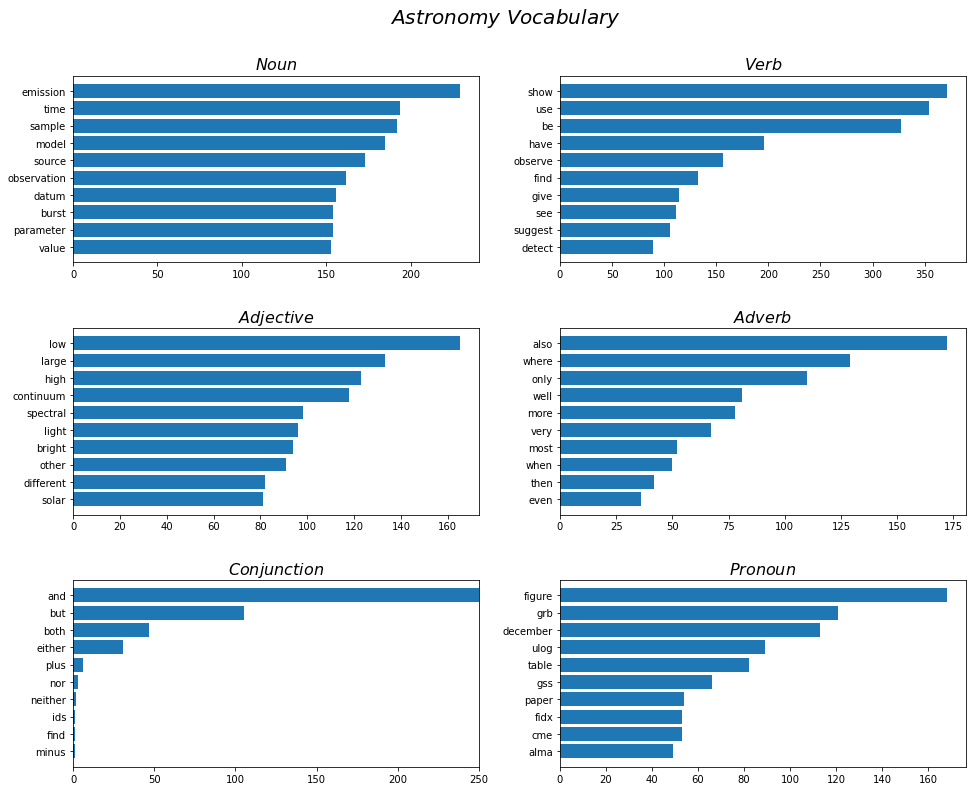

In [3]:
#astro figure
fig,axes=plt.subplots(3,2,figsize=(16,12))
fig.suptitle('$Astronomy$ $Vocabulary$',fontsize=20)
axes[0,0].barh(astroNOUN,astroNOUNct) 
axes[0,0].set_title('$Noun$',fontsize=16)
axes[0,1].barh(astroVERB,astroVERBct)
axes[0,1].set_title('$Verb$',fontsize=16)
axes[1,0].barh(astroADJ,astroADJct)
axes[1,0].set_title('$Adjective$',fontsize=16)
axes[1,1].barh(astroADV,astroADVct)
axes[1,1].set_title('$Adverb$',fontsize=16)
axes[2,0].barh(astroCCONJ,astroCCONJct)
axes[2,0].set_title('$Conjunction$',fontsize=16)
axes[2,0].set_xlim(0,250)
axes[2,1].barh(astroPROPN,astroPROPNct)
axes[2,1].set_title('$Pronoun$',fontsize=16)
#fig.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
fig.savefig('astro_figure.jpg')

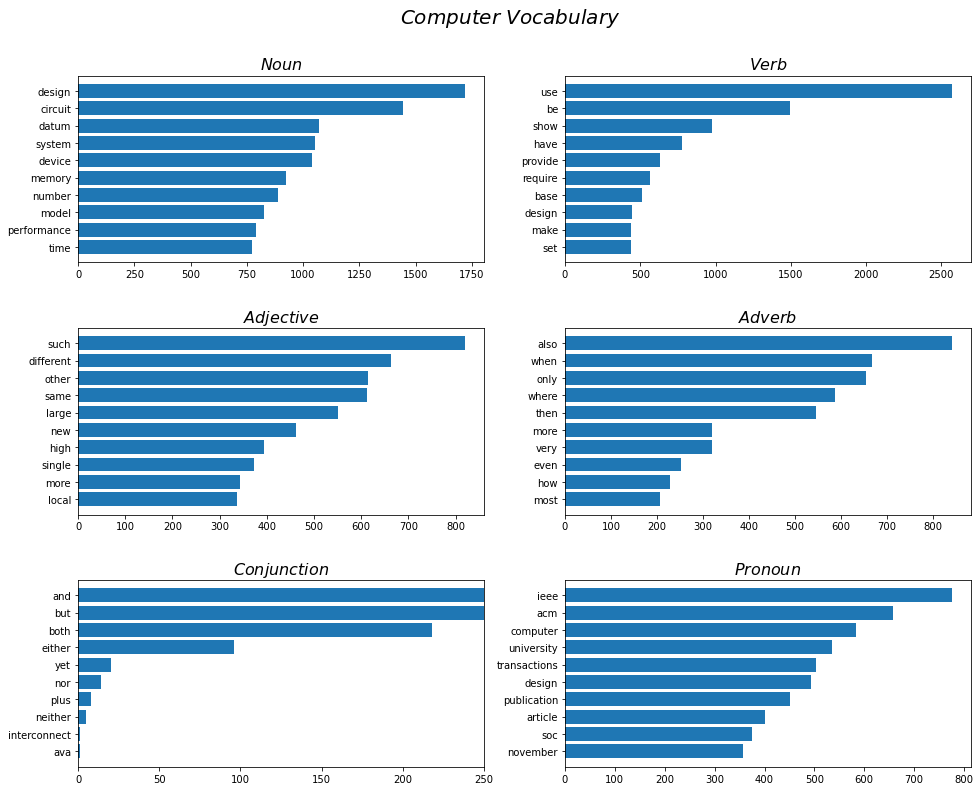

In [6]:
#comp figure
fig,axes=plt.subplots(3,2,figsize=(16,12))
fig.suptitle('$Computer$ $Vocabulary$',fontsize=20)
axes[0,0].barh(compNOUN,compNOUNct) 
axes[0,0].set_title('$Noun$',fontsize=16)
axes[0,1].barh(compVERB,compVERBct)
axes[0,1].set_title('$Verb$',fontsize=16)
axes[1,0].barh(compADJ,compADJct)
axes[1,0].set_title('$Adjective$',fontsize=16)
axes[1,1].barh(compADV,compADVct)
axes[1,1].set_title('$Adverb$',fontsize=16)
axes[2,0].barh(compCCONJ,compCCONJct)
axes[2,0].set_title('$Conjunction$',fontsize=16)
axes[2,0].set_xlim(0,250)
axes[2,1].barh(compPROPN,compPROPNct)
axes[2,1].set_title('$Pronoun$',fontsize=16)
#fig.tight_layout()
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
fig.savefig('comp_figure.jpg')

In [14]:
compNOUNct
compNOUN

['design',
 'circuit',
 'datum',
 'system',
 'device',
 'memory',
 'number',
 'model',
 'performance',
 'time']

In [15]:
compVERB.reverse()
compVERBct.reverse()

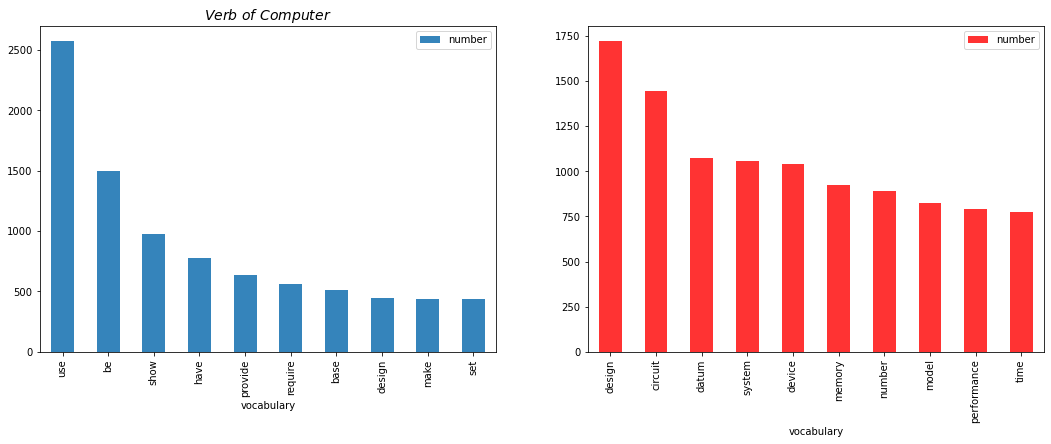

In [41]:
#画两个学科的对比图
#读取文件画图
df_comp=pd.read_csv('computer_data.csv')
df_comp=df_comp.set_index(['part of speech','vocabulary'])
df_comp.head()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,6))
df_comp.loc['VERB'][0:10].plot(ax=ax1,kind='bar',width=0.5,alpha=0.9) 
ax1.set_title('$Verb$ $of$ $Astronomy$  ',fontsize=14)
ax1.tick_params(labelsize=10)
df_comp.loc['NOUN'][0:10].plot(ax=ax2,kind='bar',color='r',width=0.5,alpha=0.8)
ax1.set_title('$Verb$ $of$ $Computer$',fontsize=14)
ax1.tick_params(labelsize=10)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#读取astro_data
df_astro=pd.read_csv('astro_data.csv')
#df_astro=df_astro.set_index('part of speech')
#读取computer_data
df_comp=pd.read_csv('computer_data.csv')
#df_comp=df_comp.set_index('part of speech')


In [8]:
df_astro.head(50)

part of speech    vocabulary  number
0            NOUN        galaxy    1065
1            NOUN          star     830
2            NOUN         model     771
3            NOUN         value     705
4            NOUN         datum     674
5            NOUN        source     670
6            NOUN          line     663
7            NOUN       density     557
8            NOUN          time     553
9            NOUN         image     551
10           NOUN     parameter     537
11           NOUN        sample     504
12           NOUN      emission     504
13           NOUN        result     500
14           NOUN  distribution     490
15           NOUN          mass     486
16           NOUN          disk     466
17           NOUN   observation     444
18           NOUN         group     438
19           NOUN        energy     411
20           NOUN       cluster     400
21           NOUN      velocity     382
22           NOUN        system     381
23           NOUN      redshift     378
24           NOUN          halo     348
25           NOUN     formation     344
26           NOUN         radio     343
27           NOUN        number     339
28           NOUN         range     329
29           NOUN       section     315
30           NOUN        region     299
31           NOUN          dust     297
32           NOUN   measurement     282
33           NOUN          peak     281
34           NOUN         limit     276
35           NOUN      function     276
36           NOUN         error     272
37           NOUN     abundance     267
38           NOUN        proﬁle     265
39           NOUN          rate     261
40           NOUN         panel     258
41           NOUN      fraction     255
42           NOUN        figure     245
43           NOUN          ﬁeld     235
44           NOUN     structure     235
45           NOUN         ratio     234
46           NOUN    population     230
47           NOUN           ﬂux     227
48           NOUN      analysis     227
49           NOUN      electron     226

In [19]:
#df_comp.head()
#df_comp.loc['NOUN'].sort_values('number').head()
df_astro.loc['NOUN'][0:10].sort_values('number')['number']

part of speech
NOUN      image
NOUN       time
NOUN    density
NOUN       line
NOUN     source
NOUN      datum
NOUN      value
NOUN      model
NOUN       star
NOUN     galaxy
Name: vocabulary, dtype: object

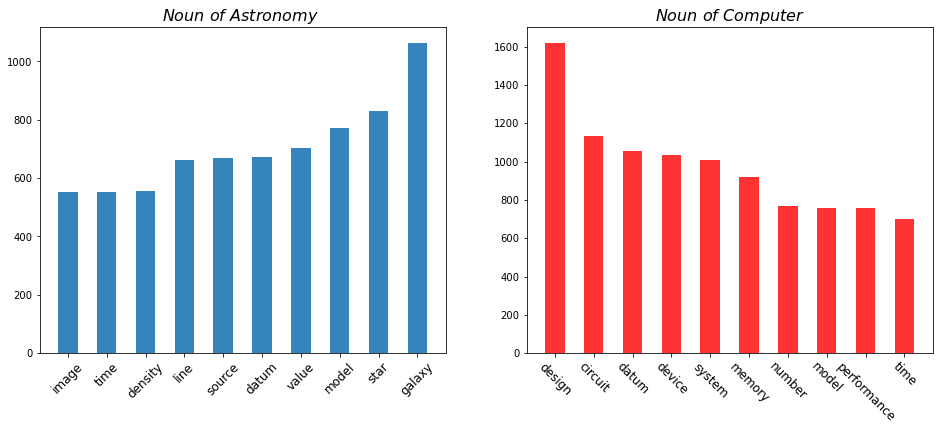

In [85]:
#名词分析
fig,axes=plt.subplots(1,2,figsize=(16,6))
axes[0].bar(df_astro.loc['NOUN'][0:10].sort_values('number')['vocabulary'],df_astro.loc['NOUN'][0:10].sort_values('number')['number'],width=0.5,alpha=0.9) 
axes[0].set_title('$Noun$ $of$ $Astronomy$  ',fontsize=16)
axes[0].tick_params(axis='x',labelsize=12,rotation=45)
axes[1].bar(df_comp.loc['NOUN']['vocabulary'][0:10],df_comp.loc['NOUN']['number'][0:10],color='r',width=0.5,alpha=0.8)
axes[1].set_title('$Noun$ $of$ $Computer$',fontsize=16)
axes[1].tick_params(axis='x',labelsize=12,rotation=315)
fig.savefig('Noun.svg')

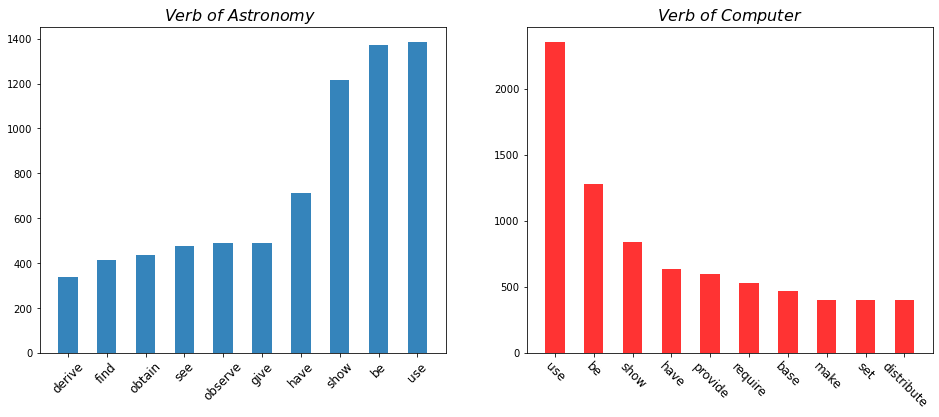

In [82]:
#动词分析
fig,axes=plt.subplots(1,2,figsize=(16,6))
axes[0].bar(df_astro.loc['VERB'][0:10].sort_values('number')['vocabulary'],df_astro.loc['VERB'][0:10].sort_values('number')['number'],width=0.5,alpha=0.9) 
axes[0].set_title('$Verb$ $of$ $Astronomy$  ',fontsize=16)
axes[0].tick_params(axis='x',labelsize=12,rotation=45)
axes[1].bar(df_comp.loc['VERB']['vocabulary'][0:10],df_comp.loc['VERB']['number'][0:10],color='r',width=0.5,alpha=0.8)
axes[1].set_title('$Verb$ $of$ $Computer$',fontsize=16)
axes[1].tick_params(axis='x',labelsize=12,rotation=315)
fig.savefig('verb.svg')

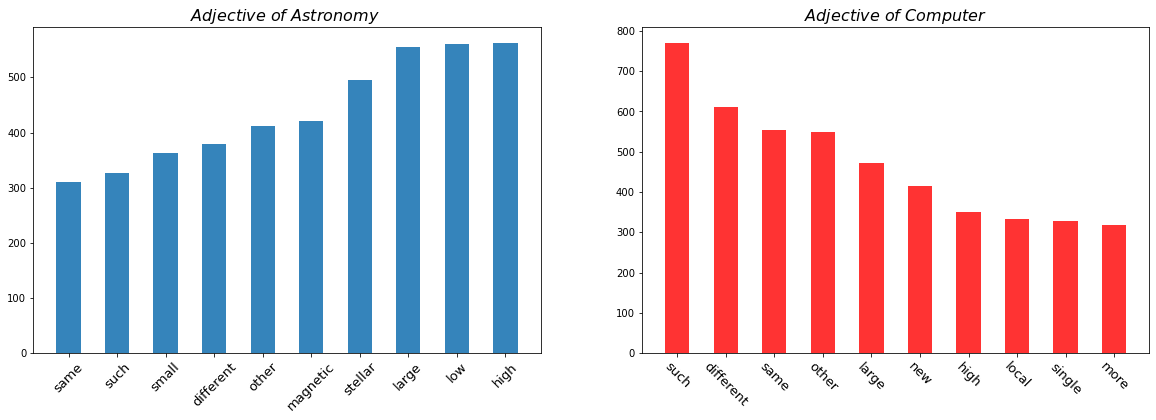

In [83]:
#形容词分析
fig,axes=plt.subplots(1,2,figsize=(20,6))
axes[0].bar(df_astro.loc['ADJ'][0:10].sort_values('number')['vocabulary'],df_astro.loc['ADJ'][0:10].sort_values('number')['number'],width=0.5,alpha=0.9) 
axes[0].set_title('$Adjective$ $of$ $Astronomy$  ',fontsize=16)
axes[0].tick_params(axis='x',labelsize=13,rotation=45)
axes[1].bar(df_comp.loc['ADJ']['vocabulary'][0:10],df_comp.loc['ADJ']['number'][0:10],color='r',width=0.5,alpha=0.8)
axes[1].set_title('$Adjective$ $of$ $Computer$',fontsize=16)
axes[1].tick_params(labelsize=10)
axes[1].tick_params(axis='x',labelsize=13,rotation=315)


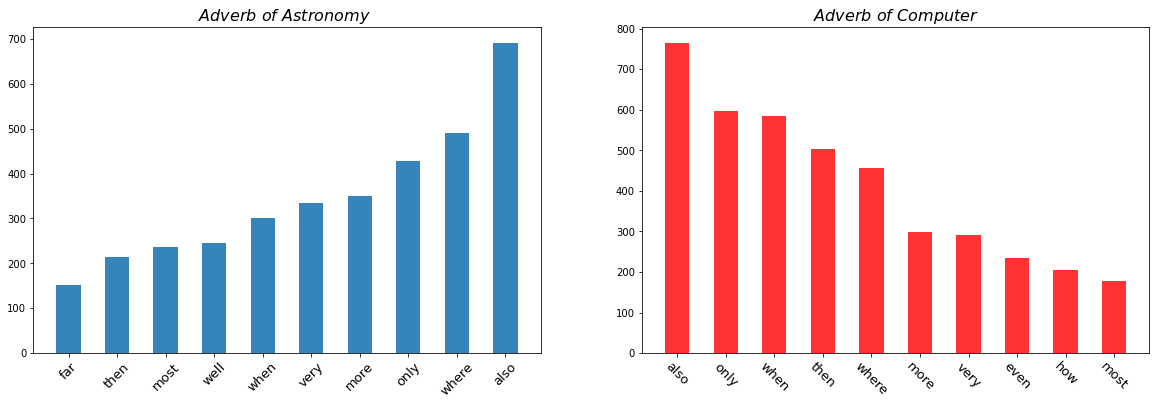

In [84]:
#副词分析
fig,axes=plt.subplots(1,2,figsize=(20,6))
axes[0].bar(df_astro.loc['ADV'][0:10].sort_values('number')['vocabulary'],df_astro.loc['ADV'][0:10].sort_values('number')['number'],width=0.5,alpha=0.9) 
axes[0].set_title('$Adverb$ $of$ $Astronomy$  ',fontsize=16)
axes[0].tick_params(axis='x',labelsize=13,rotation=45)
axes[1].bar(df_comp.loc['ADV']['vocabulary'][0:10],df_comp.loc['ADV']['number'][0:10],color='r',width=0.5,alpha=0.8)
axes[1].set_title('$Adverb$ $of$ $Computer$',fontsize=16)
axes[1].tick_params(labelsize=10)
axes[1].tick_params(axis='x',labelsize=13,rotation=315)


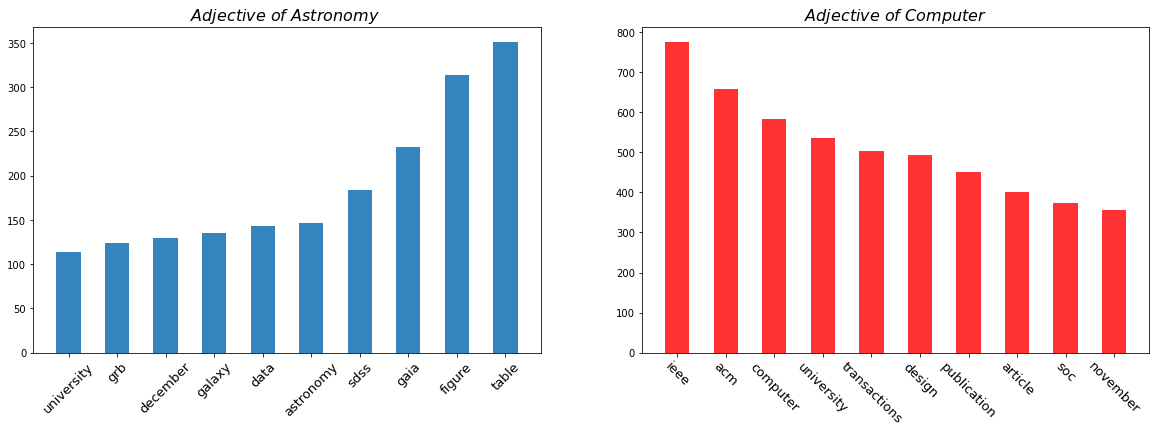

In [50]:
#形容词分析
fig,axes=plt.subplots(1,2,figsize=(20,6))
axes[0].bar(df_astro.loc['PROPN'][0:10].sort_values('number')['vocabulary'],df_astro.loc['PROPN'][0:10].sort_values('number')['number'],width=0.5,alpha=0.9) 
axes[0].set_title('$Adjective$ $of$ $Astronomy$  ',fontsize=16)
axes[0].tick_params(axis='x',labelsize=13,rotation=45)
axes[1].bar(df_comp.loc['PROPN']['vocabulary'][0:10],df_comp.loc['PROPN']['number'][0:10],color='r',width=0.5,alpha=0.8)
axes[1].set_title('$Adjective$ $of$ $Computer$',fontsize=16)
axes[1].tick_params(labelsize=10)
axes[1].tick_params(axis='x',labelsize=13,rotation=315)


(0.0, 1000.0)

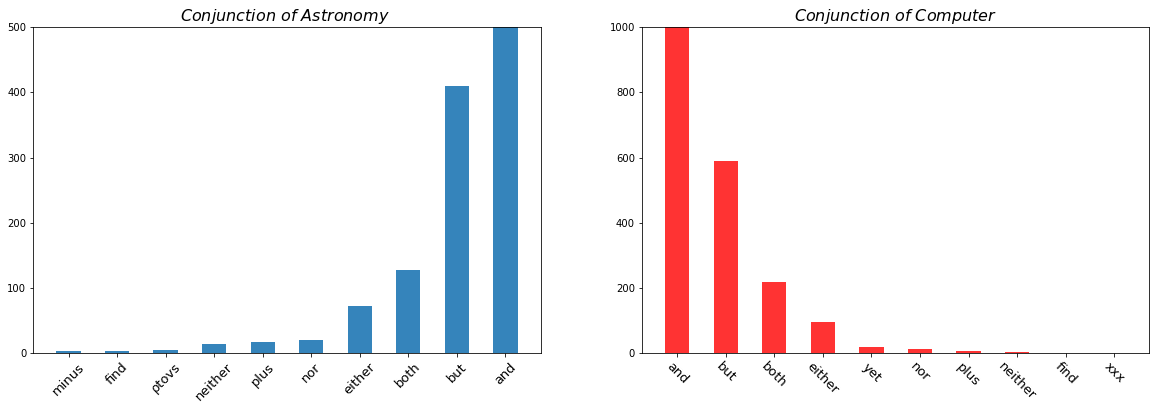

In [56]:
#连词分析
fig,axes=plt.subplots(1,2,figsize=(20,6))
axes[0].bar(df_astro.loc['CCONJ'][0:10].sort_values('number')['vocabulary'],df_astro.loc['CCONJ'][0:10].sort_values('number')['number'],width=0.5,alpha=0.9) 
axes[0].set_title('$Conjunction$ $of$ $Astronomy$  ',fontsize=16)
axes[0].tick_params(axis='x',labelsize=13,rotation=45)
axes[0].set_ylim(0,500)
axes[1].bar(df_comp.loc['CCONJ']['vocabulary'][0:10],df_comp.loc['CCONJ']['number'][0:10],color='r',width=0.5,alpha=0.8)
axes[1].set_title('$Conjunction$ $of$ $Computer$',fontsize=16)
axes[1].tick_params(labelsize=10)
axes[1].tick_params(axis='x',labelsize=13,rotation=315)
axes[1].set_ylim(0,1000)


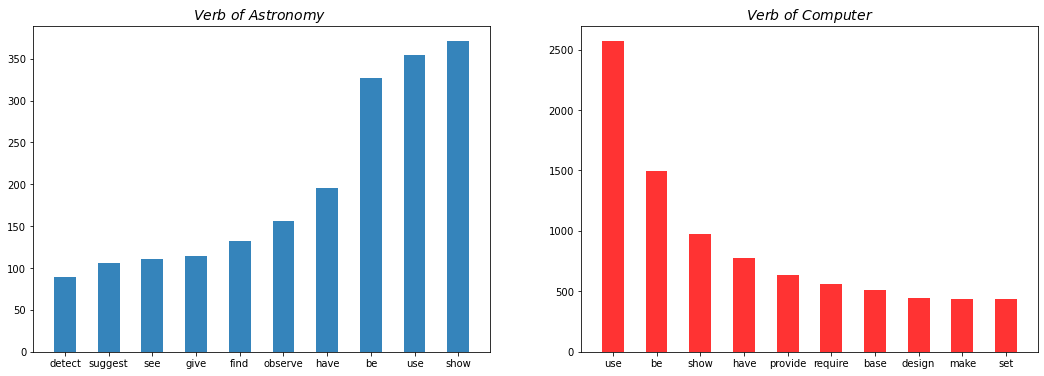

In [18]:
#副词分析
fig,axes=plt.subplots(1,2,figsize=(18,6))
axes[0].bar(astroVERB,astroVERBct,width=0.5,alpha=0.9) 
axes[0].set_title('$Verb$ $of$ $Astronomy$  ',fontsize=14)
axes[0].tick_params(labelsize=10)
axes[1].bar(compVERB,compVERBct,color='r',width=0.5,alpha=0.8)
axes[1].set_title('$Verb$ $of$ $Computer$',fontsize=14)
axes[1].tick_params(labelsize=10)
fig.savefig('2.jpg')

In [ ]:
#